<h1><center>LOG6953C - TP3</center></h1>

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit import *

from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
from qiskit.tools.monitor import job_monitor
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

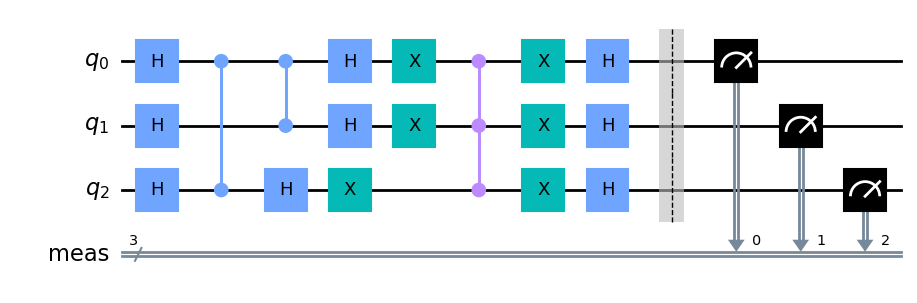

In [97]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2,1,0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)
grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

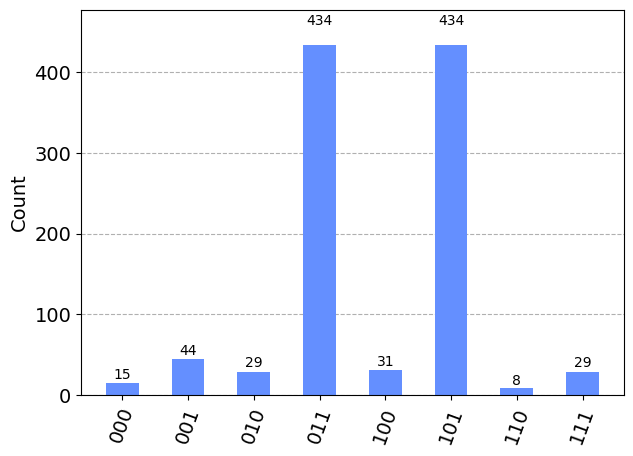

In [98]:
# Run 3 qubit Grover on Fake Nairobi noisy simulator
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()
# device_backend = BasicAer.get_backend('qasm_simulator')
sim_nairo = AerSimulator.from_backend(device_backend)

from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)
# job=execute(grover_circuit, device_backend, shots=100000)
# Get the results from the computation,
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

In [46]:
# Run 3 qubit Grover on IBM_Nairobi
IBMQ.save_account(
    'e31a3c8ff39a7a22b6a3052adfb2d4d150b53f5bcac9b161fefba1349302c57ffbf55da2b310ecd734c74be5874804be20d4c1cc4e0345e74db6569e9989fab8',
    overwrite=True)
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

device = provider.get_backend("ibm_nairobi")
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
# qobj = assemble(grover_circuit, backend=backend, shots=shots_number)

job_monitor(job, interval=2)
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

ibmqfactory.load_account:WARNING:2023-04-06 18:40:24,597: Credentials are already in use. The existing account in the session will be replaced.


KeyboardInterrupt: 

Question 2

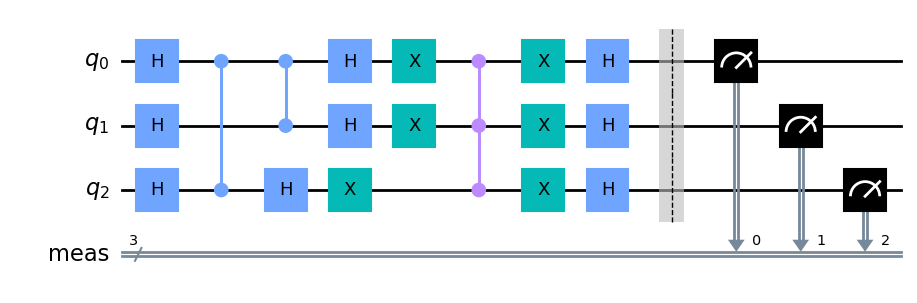

In [99]:
set_of_circuits = dict()

circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)

prog.measure_all()
'''

set_of_circuits["circuit"]=[circuit]

exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

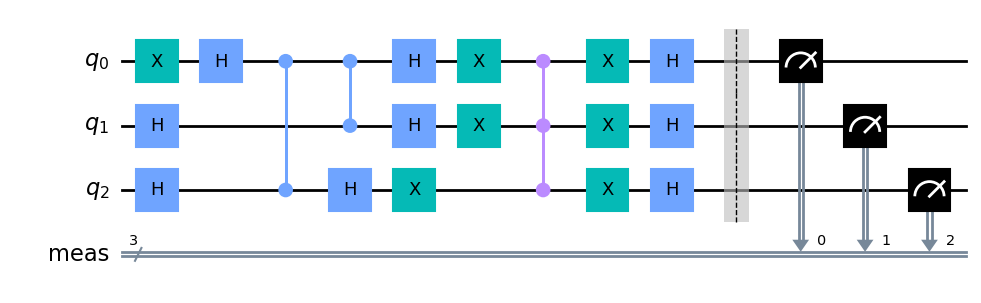

In [100]:
# inversion de qubit 
mutant_1 = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_1"]=[mutant_1]

exec(mutant_1)
prog.draw(output='mpl')

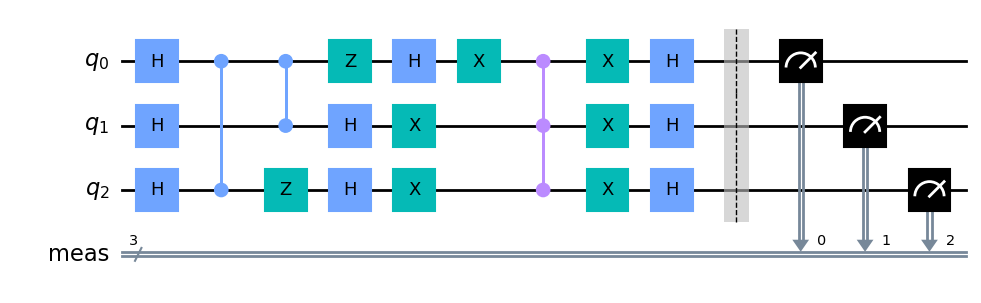

In [101]:
# insertion de porte
mutant_2 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.z(0)
prog.z(2)
for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)
prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_2"]=[mutant_2]

exec(mutant_2)
prog.draw(output='mpl')

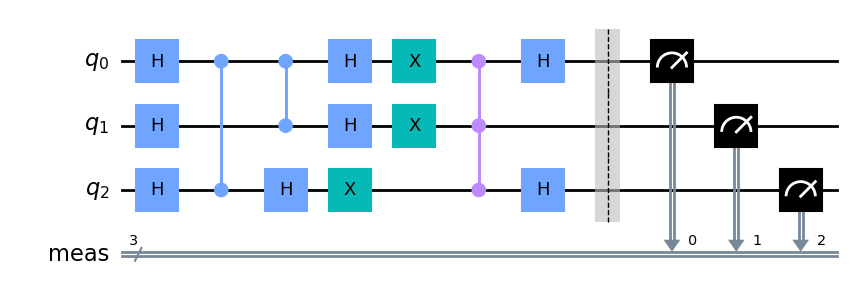

In [102]:
# suppression de porte
mutant_3 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

# prog.x(0)
# prog.x(2)
    
prog.h(0)
# prog.h(1)
prog.h(2)
    
prog.measure_all()
'''

set_of_circuits["mutant_3"]=[mutant_3]

exec(mutant_3)
prog.draw(output='mpl')

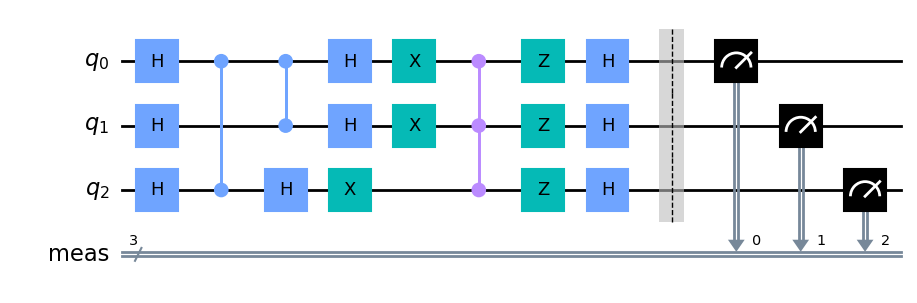

In [103]:
# changement de porte
mutant_4 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.z(0)
prog.z(1)
prog.z(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_4"]=[mutant_4]

exec(mutant_4)
prog.draw(output='mpl')

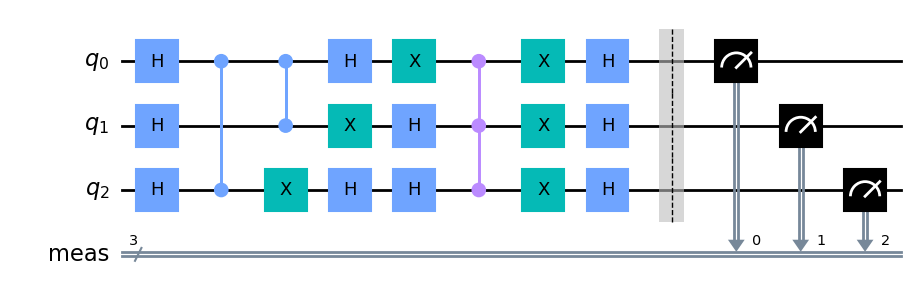

In [104]:
# échange de porte
mutant_5 = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

prog.h(0)
prog.x(1)
prog.x(2)

prog.x(0)
prog.h(1)
prog.h(2)
prog.h(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

set_of_circuits["mutant_5"]=[mutant_5]

exec(mutant_5)
prog.draw(output='mpl')

In [105]:
print(list(set_of_circuits.keys()))

['circuit', 'mutant_1', 'mutant_2', 'mutant_3', 'mutant_4', 'mutant_5']


Variants

In [106]:
def cz_to_hcnoth(codeline:str,number:int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline)+"# number="+str(number)+"\n"+\
               re.sub('cz', "cx", new_codeline)+"# number="+str(number+1)+"\n"+\
               re.sub('cz[(](.*)[,]',"h(", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

In [107]:
def x_to_cnotxcnot(codeline:str,number:int):
    help_qubit_now = re.compile("prog.x[(]")
    help_qubit = int(codeline[help_qubit_now.search(codeline).span()[1]]) #can not handle 10+ qubits
    if help_qubit==0:
        help_qubit = 1
    else:
        help_qubit = 0
    if re.search('prog.x', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('x[(]', "cx("+str(help_qubit)+",", new_codeline)+"# number="+str(number)+"\n"+\
               new_codeline+"# number="+str(number+1)+"\n"+\
               re.sub(r'x[(]', "cx("+str(help_qubit)+",", new_codeline)+"# number="+str(number+2)+"\n"
    else:
        raise Exception('No X gate for X transformation')

In [108]:
def x_to_hssh(codeline:str,number:int):
    if re.search('prog.x',codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        codeline = re.sub(r'x',"h",new_codeline)+"# number="+str(number)+"\n"+\
                   re.sub(r'x',"s",new_codeline)+"# number="+str(number+1)+"\n"+ \
                   re.sub(r'x', "s", new_codeline)+"# number="+str(number+2)+"\n" + \
                   re.sub(r'x', "h", new_codeline) + "# number=" + str(number + 3) + "\n"
        return codeline
    else:
        raise Exception('No X gate for HSSH transformation')

In [109]:
# Premier variant : cz_to_hcnoth
# Second variant : x_to_cnotxcnot
# Troisieme variant : x_to_hssh
# Quatrieme variant : switch prog.cz(2, 0) et prog.cz(1, 0)
# Cinquieme varaint : ajouter double x

In [110]:
# Définition des fonctions de création des variants

def create_first_three_variants(code_circuit, function, search_sequence):
    lines = code_circuit.splitlines()
    variant = ""
    for i, line in enumerate(lines):
        if search_sequence in line:
            variant+='\n'+function(line,i)
        else :
            variant+='\n'+line
    return variant

def create_variant_1(code_circuit):
    return create_first_three_variants(code_circuit, cz_to_hcnoth, 'prog.cz')

def create_variant_2(code_circuit):
    return create_first_three_variants(code_circuit, x_to_cnotxcnot, 'prog.x')

def create_variant_3(code_circuit):
    return create_first_three_variants(code_circuit, x_to_hssh, 'prog.x')

def create_variant_4(code_circuit):
    inter = re.sub('prog.cz\(2, 0\)', "first_gate", re.sub('prog.cz\(1, 0\)', "second_gate", code_circuit))
    variant = re.sub('second_gate', 'prog.cz(2, 0)', re.sub("first_gate", 'prog.cz(1, 0)', inter))
    return variant

def create_variant_5(code_circuit):
    variant = re.sub('prog.cz\(2, 0\)', "prog.cz(2, 0)\nprog.x(1)\nprog.x(1)",  code_circuit)
    return variant

In [111]:
#Création des variants
for variant in list(set_of_circuits.keys()):
    set_of_circuits[variant].append(create_variant_1(set_of_circuits[variant][0]))
    set_of_circuits[variant].append(create_variant_2(set_of_circuits[variant][0]))
    set_of_circuits[variant].append(create_variant_3(set_of_circuits[variant][0]))
    set_of_circuits[variant].append(create_variant_4(set_of_circuits[variant][0]))
    set_of_circuits[variant].append(create_variant_5(set_of_circuits[variant][0]))

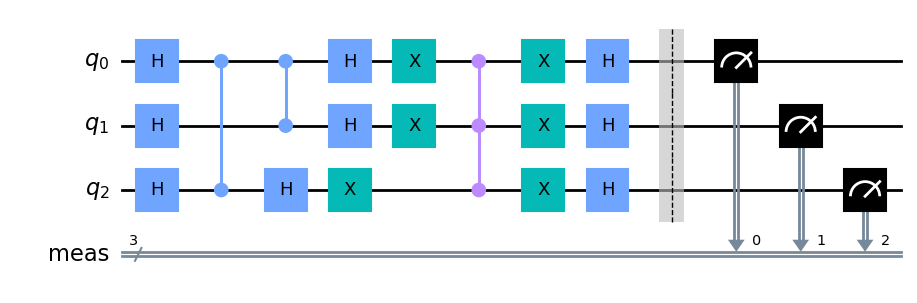

In [112]:
exec(circuit)
prog.draw(output='mpl')

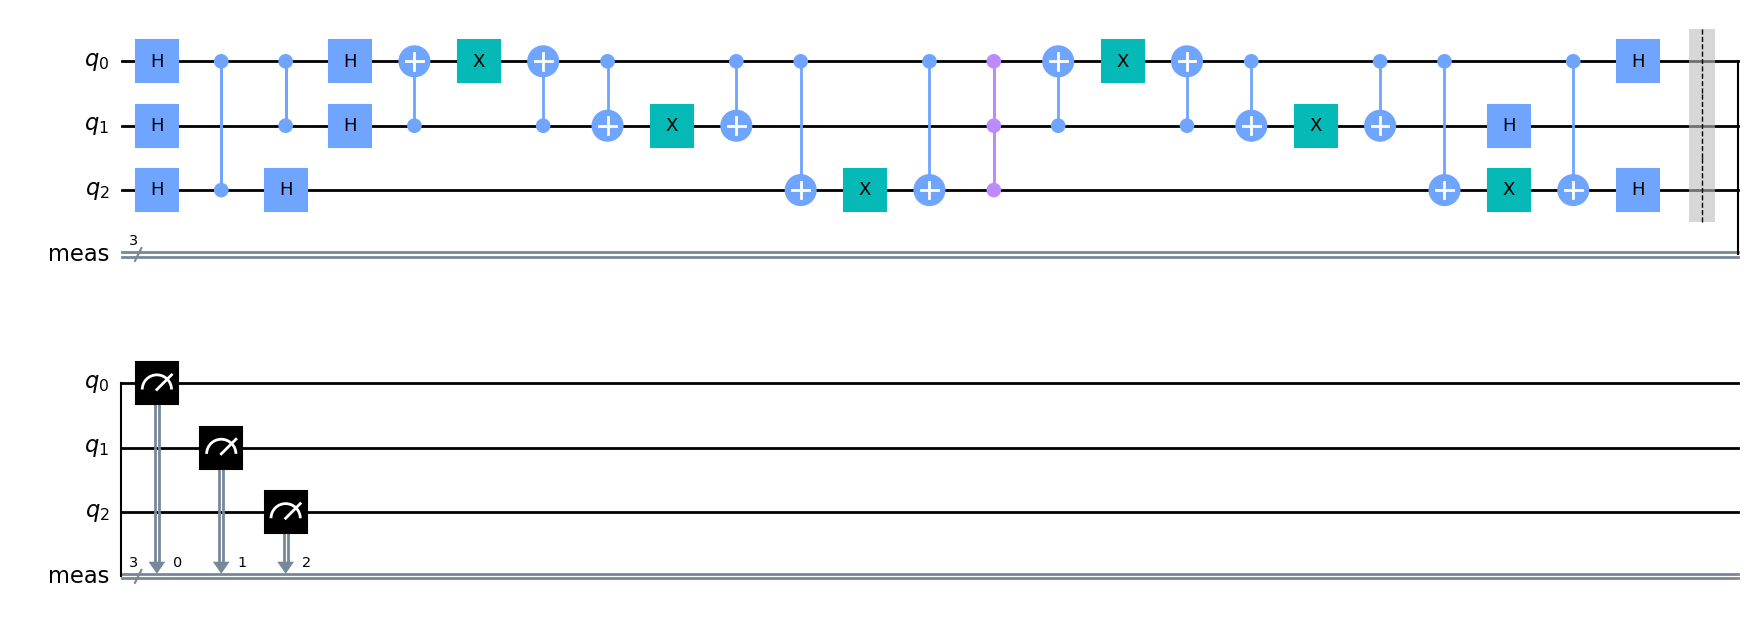

In [113]:
exec(create_variant_2(circuit))
# print(set_of_circuits['circuit'][2])
# exec(set_of_circuits['circuit'][2])
prog.draw(output='mpl')

In [114]:
print(list(set_of_circuits.keys()))
print(len(set_of_circuits['circuit']))

['circuit', 'mutant_1', 'mutant_2', 'mutant_3', 'mutant_4', 'mutant_5']
6


Question 3

In [115]:
number_of_shots = 10000

In [118]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
print("Compare chaque set de circuit équivalent \navec sa version de référence.")
for mutant in list(set_of_circuits.keys()):
    print("\nMutant =", mutant)
    circuit_ref = set_of_circuits[mutant][0]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=number_of_shots)
    answer_ref = job_ref.result().get_counts()
    rvs = [answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))]
    rvs_cumulatif = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])
    #rvs_full = np.array([j for j in range(len(rvs)) for i in range(rvs[j])])
    v=0
    for circuit in set_of_circuits[mutant][1:]:
        exec(circuit)
        v+=1
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=number_of_shots)
        answer = job.result().get_counts()
        cdf = [answer[qubit] for qubit in sorted(list(answer.keys()))]
        cdf_cumulatif = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
        # cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        D, p_value = stats.kstest(rvs_cumulatif, cdf_cumulatif, alternative= "two-sided")
        print("Variant "+str(v)+" : D="+str(D)+" p-value="+str(p_value))

Compare chaque set de circuit équivalent 
avec sa version de référence.

Mutant = circuit
Variant 1 : D=0.125 p-value=1.0
Variant 2 : D=0.25 p-value=0.98010878010878
Variant 3 : D=0.125 p-value=1.0
Variant 4 : D=0.125 p-value=1.0
Variant 5 : D=0.125 p-value=1.0

Mutant = mutant_1
Variant 1 : D=0.125 p-value=1.0
Variant 2 : D=0.25 p-value=0.98010878010878
Variant 3 : D=0.25 p-value=0.98010878010878
Variant 4 : D=0.125 p-value=1.0
Variant 5 : D=0.25 p-value=0.98010878010878

Mutant = mutant_2
Variant 1 : D=0.125 p-value=1.0
Variant 2 : D=0.125 p-value=1.0
Variant 3 : D=0.125 p-value=1.0
Variant 4 : D=0.125 p-value=1.0
Variant 5 : D=0.125 p-value=1.0

Mutant = mutant_3
Variant 1 : D=0.125 p-value=1.0
Variant 2 : D=0.125 p-value=1.0
Variant 3 : D=0.125 p-value=1.0
Variant 4 : D=0.125 p-value=1.0
Variant 5 : D=0.125 p-value=1.0

Mutant = mutant_4
Variant 1 : D=0.125 p-value=1.0
Variant 2 : D=0.25 p-value=0.98010878010878
Variant 3 : D=0.125 p-value=1.0
Variant 4 : D=0.125 p-value=1.0
Varian

Courbes

Compare chaque set de circuit équivalent avec sa version de référence.
Mutant = circuit


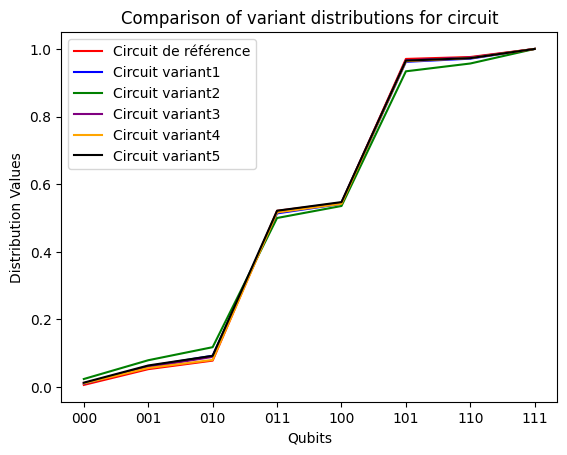

Mutant = mutant_1


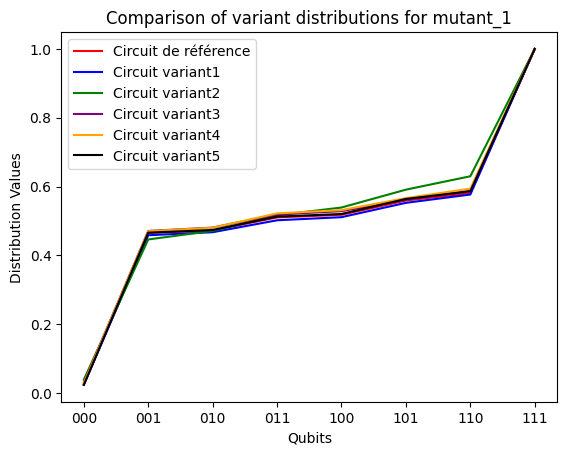

Mutant = mutant_2


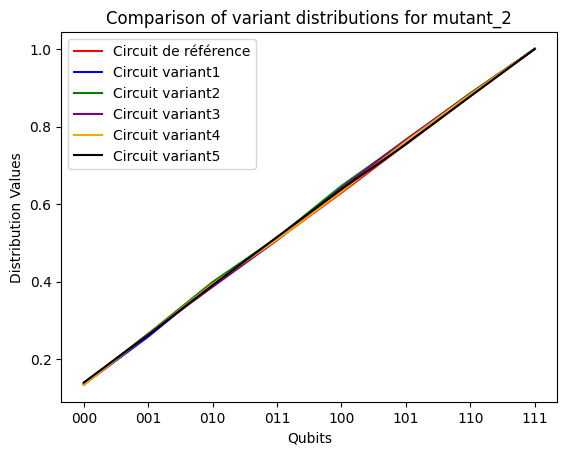

Mutant = mutant_3


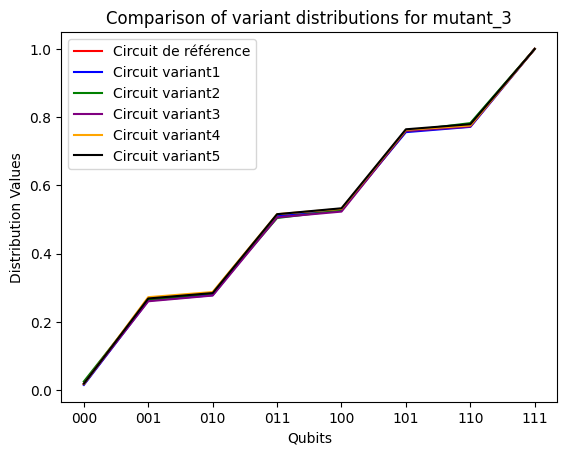

Mutant = mutant_4


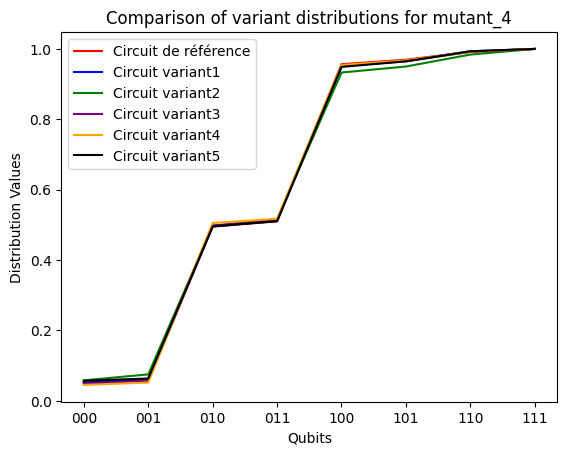

Mutant = mutant_5


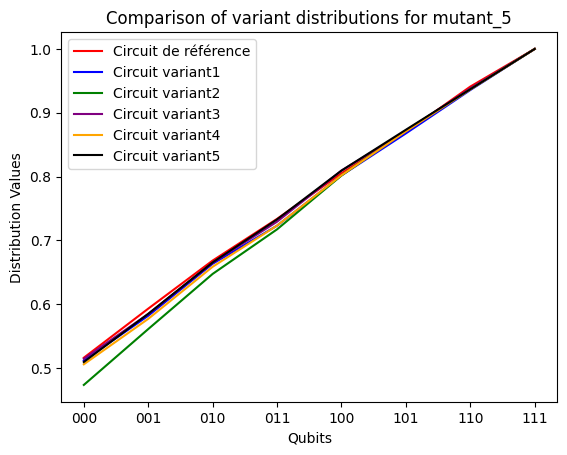

In [117]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
print("Compare chaque set de circuit équivalent avec sa version de référence.")
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
for mutant in list(set_of_circuits.keys()):
    print("Mutant =", mutant)
    circuit_ref = set_of_circuits[mutant][0]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=number_of_shots)
    answer_ref = job_ref.result().get_counts()
    rvs = [answer_ref[qubit]/number_of_shots for qubit in sorted(list(answer_ref.keys()))]
    rvs_cumulatif = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])
    # rvs_full = np.array([j for j in range(len(rvs)) for i in range(rvs[j])])
    plt.clf()
    plt.plot(sorted(list(answer_ref.keys())), rvs_cumulatif, color=colors[0], label='Circuit de référence')
    
    i=1
    for circuit in set_of_circuits[mutant][1:]:
        exec(circuit)
        
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=number_of_shots)
        answer = job.result().get_counts()
        cdf = [answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))]
        cdf_cumulatif = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
        
        plt.plot(sorted(list(answer.keys())), cdf_cumulatif, color=colors[i], label='Circuit variant'+str(i))
        i+=1
        # cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        # print(stats.kstest(rvs_full, cdf_full, alternative= "two-sided"))
    plt.legend()
    plt.title('Comparison of variant distributions for '+mutant)
    plt.xlabel('Qubits')
    plt.ylabel('Distribution Values')
    plt.savefig(mutant+' distributions.png')
    # show the plot
    plt.show()


In [23]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)

print("On compare chaque variant avec la version non mutée du même variant.")
for i in range(len(set_of_circuits['circuit'])):
    print(i)
    
    circuit_ref = set_of_circuits['circuit'][i]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=number_of_shots)
    answer_ref = job_ref.result().get_counts()
    rvs = [answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))]
    rvs_cumulatif = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])
    # rvs_full = np.array([j for j in range(len(rvs)) for i in range(rvs[j])])
    for circuit in [x for x in list(set_of_circuits.keys()) if x != "circuit"]:
        exec(set_of_circuits[circuit][i])
        
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=number_of_shots)
        answer = job.result().get_counts()
        cdf = [answer[qubit] for qubit in sorted(list(answer.keys()))]
        cdf_cumulatif = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
        # cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        print(stats.kstest(rvs_cumulatif, cdf_cumulatif, alternative= "two-sided"))


On compare chaque variant avec la version non mutée du même variant.
0
KstestResult(statistic=0.4108, pvalue=0.0, statistic_location=1, statistic_sign=-1)
KstestResult(statistic=0.3165, pvalue=1e-323, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.2165, pvalue=1.339753460536632e-205, statistic_location=1, statistic_sign=-1)
KstestResult(statistic=0.4245, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.5911, pvalue=0.0, statistic_location=2, statistic_sign=-1)
1
KstestResult(statistic=0.4059, pvalue=0.0, statistic_location=5, statistic_sign=1)
KstestResult(statistic=0.301, pvalue=1e-323, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.2028, pvalue=2.813612844441207e-180, statistic_location=1, statistic_sign=-1)
KstestResult(statistic=0.4238, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.5819, pvalue=0.0, statistic_location=2, statistic_sign=-1)
2
KstestResult(statistic=0.3786, pvalue=0.0, 

Compare chaque set de circuit équivalent avec sa version de référence.
0


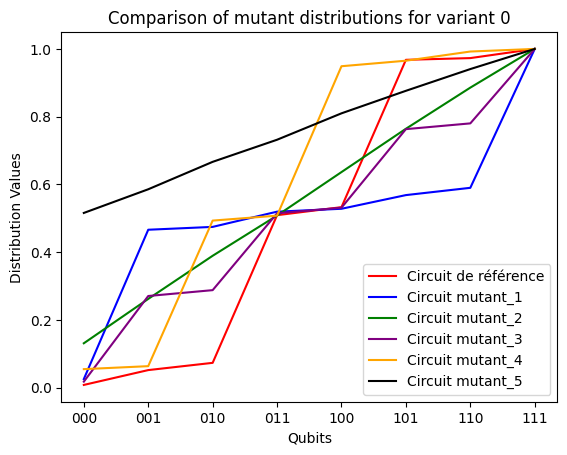

1


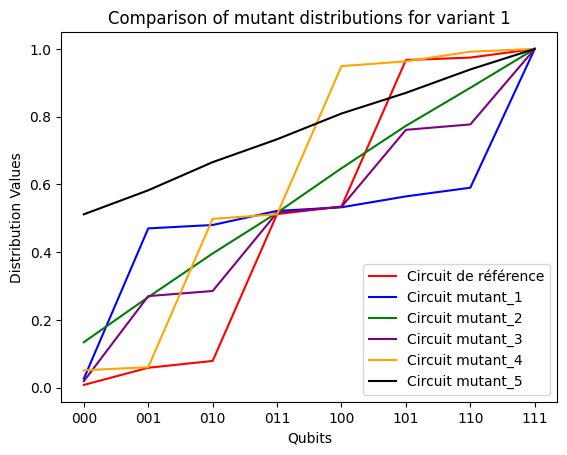

2


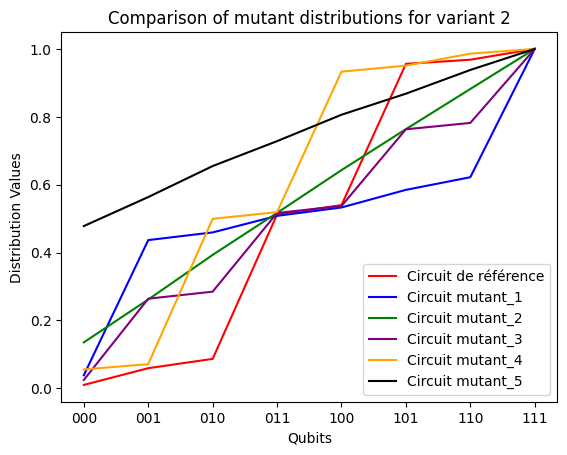

3


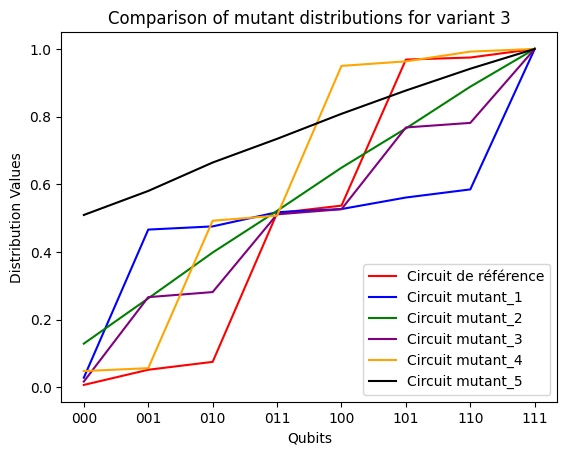

4


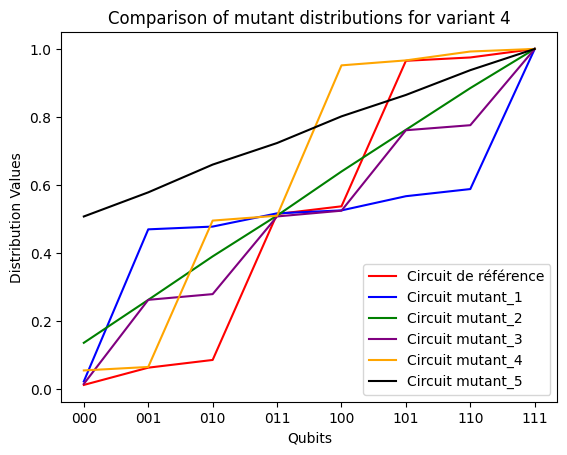

5


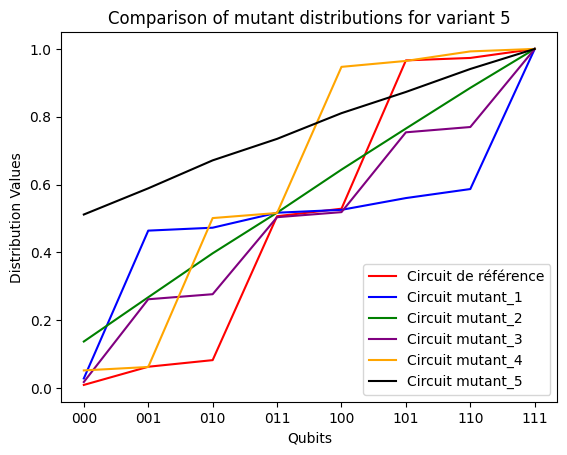

In [24]:
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
print("Compare chaque set de circuit équivalent avec sa version de référence.")
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']
for i in range(len(set_of_circuits['circuit'])):
    print(i)
    circuit_ref = set_of_circuits['circuit'][i]
    exec(circuit_ref)
    
    transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
    job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=number_of_shots)
    answer_ref = job_ref.result().get_counts()
    rvs = [answer_ref[qubit]/number_of_shots for qubit in sorted(list(answer_ref.keys()))]
    rvs_cumulatif = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])
    # rvs_full = np.array([j for j in range(len(rvs)) for i in range(rvs[j])])
    plt.clf()
    plt.plot(sorted(list(answer_ref.keys())), rvs_cumulatif, color=colors[0], label='Circuit de référence')
    c=1
    for circuit in [x for x in list(set_of_circuits.keys()) if x != "circuit"]:
        exec(set_of_circuits[circuit][i])
        
        transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
        job = execute(prog, sim_nairo, shots=number_of_shots)
        answer = job.result().get_counts()
        cdf = [answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))]
        cdf_cumulatif = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
        # cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
        plt.plot(sorted(list(answer.keys())), cdf_cumulatif, color=colors[c], label='Circuit '+circuit)
        c+=1
        # cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        # print(stats.kstest(rvs_full, cdf_full, alternative= "two-sided"))
    plt.legend()
    plt.title('Comparison of mutant distributions for variant '+str(i))
    plt.xlabel('Qubits')
    plt.ylabel('Distribution Values')
    plt.savefig(str(i)+' variant distributions.png')
    # show the plot
    plt.show()


[90, 502, 225, 4389, 221, 4230, 74, 269]
[0 0 0 ... 7 7 7]


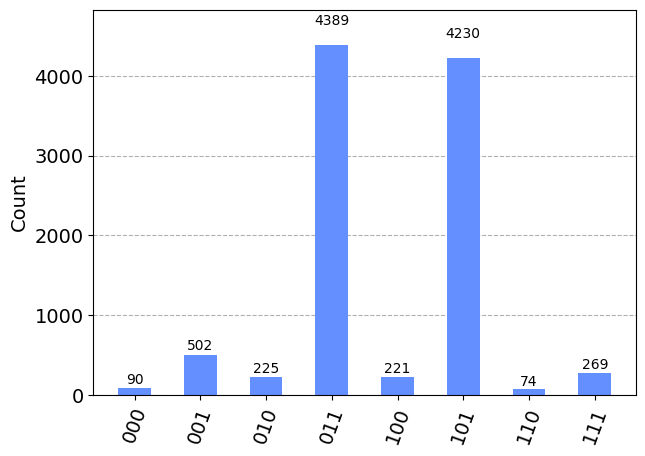

In [33]:
circuit = '''prog = QuantumCircuit(3)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)
    
prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)

prog.measure_all()
'''

exec(set_of_circuits['circuit'][0])


transpiled_grover_circuit_ref = transpile(prog, sim_nairo, optimization_level=3)
job_ref = execute(transpiled_grover_circuit_ref, sim_nairo, shots=number_of_shots)
answer_ref = job_ref.result().get_counts()
rvs = [answer_ref[qubit] for qubit in sorted(list(answer_ref.keys()))]
# rvs_cumulatif = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])
rvs_full = np.array([j for j in range(len(rvs)) for i in range(rvs[j])])
print(rvs)
print(rvs_full)
plot_histogram(answer_ref)


[0 0 0 ... 7 7 7]
[0 0 0 ... 7 7 7]


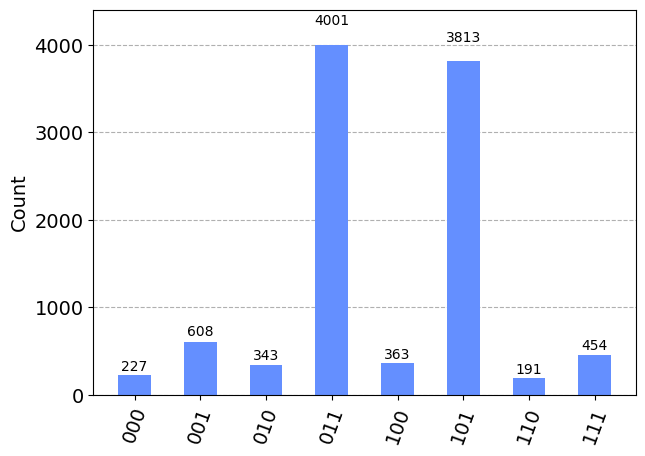

In [34]:
# suppression de porte
mutant_1 = '''prog = QuantumCircuit(3)

prog.x(0)
for q in [0, 1, 2]:
    prog.h(q)
prog.cz(2, 0)
prog.cz(1, 0)

for qubit in range(3):
    prog.h(qubit)

prog.x(0)
prog.x(1)
prog.x(2)

prog.ccz(2,1,0)

prog.x(0)
prog.x(1)
prog.x(2)
    
for qubit in range(3):
    prog.h(qubit)
    
prog.measure_all()
'''

exec(set_of_circuits['circuit'][2])


transpiled_grover_circuit = transpile(prog, sim_nairo, optimization_level=3)
job = execute(prog, sim_nairo, shots=number_of_shots)
answer = job.result().get_counts()
cdf = [answer[qubit] for qubit in sorted(list(answer.keys()))]
# cdf_cumulatif = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
cdf_full = np.array([j for j in range(len(cdf)) for i in range(cdf[j])])
print(rvs_full)
print(cdf_full)
plot_histogram(answer)


In [35]:
print(stats.kstest(rvs_full, cdf_full, alternative= "two-sided"))

KstestResult(statistic=0.0361, pvalue=4.368316420107002e-06, statistic_location=2, statistic_sign=-1)


In [36]:
L=[1,3,4]
O=[j for j in range(len(L)) for i in range(L[j])]
print(O)

[0, 1, 1, 1, 2, 2, 2, 2]


Simulation sur IBM nairobi

In [92]:
IBMQ.save_account(
    'e31a3c8ff39a7a22b6a3052adfb2d4d150b53f5bcac9b161fefba1349302c57ffbf55da2b310ecd734c74be5874804be20d4c1cc4e0345e74db6569e9989fab8',
    overwrite=True)
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

device = provider.get_backend("ibm_nairobi")

ibmqfactory.load_account:WARNING:2023-04-07 17:16:44,680: Credentials are already in use. The existing account in the session will be replaced.


In [57]:
for mutant in list(set_of_circuits.keys()):
    print("Mutant =", mutant)
    device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
    print("Running on current least busy device: ", device)
    circuit_ref = set_of_circuits[mutant][0]
    exec(circuit_ref)
    # Run our circuit on the least busy backend. Monitor the execution of the job in the queue
    transpiled_grover_circuit_ref = transpile(prog, device, optimization_level=3)
    job_ref_quantum = device.run(transpiled_grover_circuit_ref)

    job_monitor(job_ref, interval=2)
    # Get the results from the computation
    answer_ref_quantum = job_ref.result().get_counts()

    rvs_quantum = np.array([answer_ref[qubit]/number_of_shots for qubit in sorted(list(answer_ref.keys()))])
    rvs_cumulatif_quantum = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])

    for circuit in set_of_circuits[mutant][1:]:
        exec(circuit)
        device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
        print("Running on current least busy device: ", device)
        
        transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
        job_quantum = device.run(transpiled_grover_circuit_ref)

        job_monitor(job, interval=2)
        # Get the results from the computation
        answer_quantum = job.result().get_counts()

        cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
        cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
        # D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
        # print(D, p_value)
        print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Mutant = circuit
Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


RequestsApiError: "HTTPSConnectionPool(host='api.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/Network/ibm-q/Groups/open/Projects/main/devices/ibm_nairobi/queue/status (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000023AF288D2E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"

In [79]:
mutant = 'circuit'
print("Mutant =", mutant)
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                                not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)
circuit_ref = set_of_circuits[mutant][0]
exec(circuit_ref)
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
transpiled_grover_circuit_ref = transpile(prog, device, optimization_level=3)
job_ref_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job_ref, interval=2)
# Get the results from the computation
answer_ref_quantum = job_ref.result().get_counts()

rvs_quantum = np.array([answer_ref[qubit]/number_of_shots for qubit in sorted(list(answer_ref.keys()))])
rvs_cumulatif_quantum = np.array([sum(rvs[:i]) for i in range(1,len(rvs)+1)])


Mutant = circuit
Running on current least busy device:  ibm_oslo
Job Status: job has successfully run


In [81]:
print(len(set_of_circuits[mutant]))

6


In [82]:
i=1
circuit = set_of_circuits[mutant][i]
exec(circuit)
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                            not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
job_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job, interval=2)
# Get the results from the computation
answer_quantum = job.result().get_counts()

cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
# D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
# print(D, p_value)
print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


In [83]:
i=2
circuit = set_of_circuits[mutant][i]
exec(circuit)
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                            not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
job_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job, interval=2)
# Get the results from the computation
answer_quantum = job.result().get_counts()

cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
# D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
# print(D, p_value)
print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


In [84]:
i=3
circuit = set_of_circuits[mutant][i]
exec(circuit)
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                            not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
job_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job, interval=2)
# Get the results from the computation
answer_quantum = job.result().get_counts()

cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
# D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
# print(D, p_value)
print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


In [85]:
i=4
circuit = set_of_circuits[mutant][i]
exec(circuit)
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                            not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
job_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job, interval=2)
# Get the results from the computation
answer_quantum = job.result().get_counts()

cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
# D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
# print(D, p_value)
print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Running on current least busy device:  ibm_oslo
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


In [94]:
i=5
circuit = set_of_circuits[mutant][i]
exec(circuit)
# device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 6 and 
                            # not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

transpiled_grover_circuit = transpile(prog, device, optimization_level=3)
job_quantum = device.run(transpiled_grover_circuit_ref)

job_monitor(job, interval=2)
# Get the results from the computation
answer_quantum = job.result().get_counts()

cdf_quantum = np.array([answer[qubit]/number_of_shots for qubit in sorted(list(answer.keys()))])
cdf_cumulatif_quantum = np.array([sum(cdf[:i]) for i in range(1,len(cdf)+1)])
# D, p_value = stats.kstest(rvs, cdf, alternative= "two-sided")
# print(D, p_value)
print(stats.kstest(rvs_cumulatif_quantum, cdf_cumulatif_quantum, alternative= "two-sided"))

Running on current least busy device:  ibm_nairobi
Job Status: job has successfully run
KstestResult(statistic=0.125, pvalue=1.0, statistic_location=6680, statistic_sign=1)


In [122]:
number_of_shots = 4000

In [124]:
answer_ref_circuit = [77, 617, 157, 1352, 80, 1171, 77, 469]
rvs_quantum = np.array([answer_ref_circuit[i]/number_of_shots for i in range(len(answer_ref_circuit))])
rvs_cumulatif_quantum = np.array([sum(rvs_quantum[:i]) for i in range(1,len(rvs_quantum)+1)])

answer_quantum_variant_1 = [98, 577, 120, 1512, 65, 1157, 71, 400]
rvs_quantum_variant_1 = np.array([answer_quantum_variant_1[i]/number_of_shots for i in range(len(answer_quantum_variant_1))])
rvs_cumulatif_variant_1 = np.array([sum(rvs_quantum_variant_1[:i]) for i in range(1,len(rvs_quantum_variant_1)+1)])

answer_quantum_variant_2 = [99, 565, 128, 1498, 61, 1190, 66, 393]
rvs_quantum_variant_2 = np.array([answer_quantum_variant_2[i]/number_of_shots for i in range(len(answer_quantum_variant_2))])
rvs_cumulatif_variant_2 = np.array([sum(rvs_quantum_variant_2[:i]) for i in range(1,len(rvs_quantum_variant_2)+1)])

answer_quantum_variant_3 = [90, 680, 139, 1297, 78, 1229, 42, 445]
rvs_quantum_variant_3 = np.array([answer_quantum_variant_3[i]/number_of_shots for i in range(len(answer_quantum_variant_3))])
rvs_cumulatif_variant_3 = np.array([sum(rvs_quantum_variant_3[:i]) for i in range(1,len(rvs_quantum_variant_3)+1)])

answer_quantum_variant_4 = [97, 674, 115, 1400, 66, 1159, 63, 426]
rvs_quantum_variant_4 = np.array([answer_quantum_variant_4[i]/number_of_shots for i in range(len(answer_quantum_variant_4))])
rvs_cumulatif_variant_4 = np.array([sum(rvs_quantum_variant_4[:i]) for i in range(1,len(rvs_quantum_variant_4)+1)])

answer_quantum_variant_5 = [71, 637, 191, 1605, 103, 913, 104, 376]
rvs_quantum_variant_5 = np.array([answer_quantum_variant_5[i]/number_of_shots for i in range(len(answer_quantum_variant_5))])
rvs_cumulatif_variant_5 = np.array([sum(rvs_quantum_variant_5[:i]) for i in range(1,len(rvs_quantum_variant_5)+1)])

D, p_value = stats.kstest(rvs_cumulatif_quantum, rvs_cumulatif_variant_1, alternative= "two-sided")
print("Variant 1 : D="+str(D)+" p-value="+str(p_value))

D, p_value = stats.kstest(rvs_cumulatif_quantum, rvs_cumulatif_variant_2, alternative= "two-sided")
print("Variant 2 : D="+str(D)+" p-value="+str(p_value))

D, p_value = stats.kstest(rvs_cumulatif_quantum, rvs_cumulatif_variant_3, alternative= "two-sided")
print("Variant 3 : D="+str(D)+" p-value="+str(p_value))

D, p_value = stats.kstest(rvs_cumulatif_quantum, rvs_cumulatif_variant_4, alternative= "two-sided")
print("Variant 4 : D="+str(D)+" p-value="+str(p_value))

D, p_value = stats.kstest(rvs_cumulatif_quantum, rvs_cumulatif_variant_5, alternative= "two-sided")
print("Variant 5 : D="+str(D)+" p-value="+str(p_value))

Variant 1 : D=0.25 p-value=0.98010878010878
Variant 2 : D=0.25 p-value=0.98010878010878
Variant 3 : D=0.125 p-value=1.0
Variant 4 : D=0.25 p-value=0.98010878010878
Variant 5 : D=0.25 p-value=0.98010878010878
